# Unsupervised Learning

1. K-Means

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


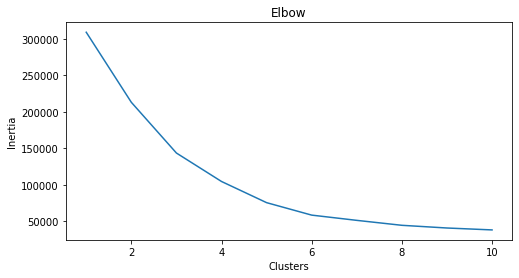

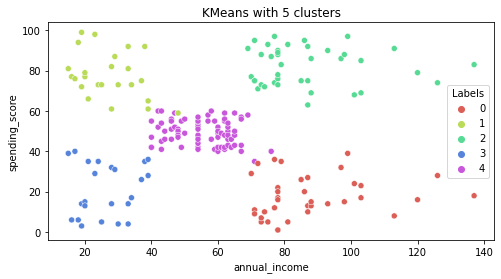

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# reading data
df = pd.read_csv('Mall_Customers.csv')

# change the column
df = df.rename ( columns = {
    'Gender' : 'gender',
    'Age' : 'age',
    'Annual Income (k$)' : 'annual_income',
    'Spending Score (1-100)' : 'spending_score'
    } )

# change gender too numeric
df['gender'].replace(['Female','Male'], [0,1], inplace=True)

# drop unnecessary columns
X = df.drop(['CustomerID', 'gender'], axis=1)

# searching for the right inertia
clusters = []
for i in range (1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

# making inertia plot
fig, ax = plt.subplots(figsize = (8,4))
sns.lineplot(x=list(range(1,11)), y = clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# making KMeans
km5 = KMeans(n_clusters=5).fit(X)

# making the labels
X['Labels'] = km5.labels_

# making plot with 5 clusters
plt.figure(figsize=(8,4))
sns.scatterplot(
    X['annual_income'], 
    X['spending_score'], 
    hue = X['Labels'],
    palette = sns.color_palette('hls', 5)
    )
plt.title('KMeans with 5 clusters')
plt.show()